<a href="https://colab.research.google.com/github/LEFT-BEE/small_project/blob/main/dog_vs_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.image as mat_image
import matplotlib.pyplot as plt
import tensorflow as tf
from keras_preprocessing import image
from keras import Sequential

from keras.models import *
from  keras.layers import *
from keras.optimizers import *


In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hanseungjin","key":"846d5bf6dc07302ec1dce37a20a41933"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

 98% 213M/218M [00:01<00:00, 151MB/s]
100% 218M/218M [00:01<00:00, 132MB/s]


In [ ]:
import zipfile 

with zipfile.ZipFile('/content/cat-and-dog.zip', 'r') as existing_zip:
    existing_zip.extractall('/content')

In [ ]:
CAT_PATH = "/content/training_set/training_set/cats/"
DOG_PATH = "/content/training_set/training_set/dogs/"
cat_list = os.listdir(CAT_PATH)
dog_list = os.listdir(DOG_PATH)

In [ ]:
CAT_test_PATH = "/content/test_set/test_set/cats/"
DOG_test_PATH = "/content/test_set/test_set/dogs/"
cat_test_list = os.listdir(CAT_test_PATH)
dog_test_list = os.listdir(DOG_test_PATH)

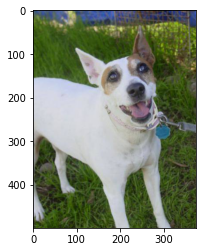

In [ ]:
img_exam = mat_image.imread(DOG_PATH+dog_list[21])
plt.imshow(img_exam)
plt.show()

In [ ]:
#cat 이미지 전처리 # 1. 이미지 크기를 조정했을때
cat_data_adsize=[]
for img_path in cat_list:
  try:
    cat_img = mat_image.imread(CAT_PATH + img_path)
    cat_img = np.resize(cat_img , (64,64,3))
    cat_img = cat_img.astype('float32') / 255.0
    cat_data_adsize.append(cat_img)

  except Exception as e:
    print("Error", e)

Error cannot identify image file '/content/training_set/training_set/cats/_DS_Store'


In [ ]:
#dog 이미지 전처리 # 1. 이미지 크기를 조정했을때
dog_data_adsize=[]
for img_path in dog_list:
  try:
    dog_img = mat_image.imread(DOG_PATH + img_path)
    dog_img = np.resize(dog_img , (64,64,3))
    dog_img = dog_img.astype('float32') / 255.0
    dog_data_adsize.append(dog_img)

  except Exception as e:
    print("Error", e)

Error cannot identify image file '/content/training_set/training_set/dogs/_DS_Store'


In [ ]:
#test이미지
cat_data_test_adsize=[]
for img_path in cat_test_list:
  try:
    cat_img = mat_image.imread(CAT_test_PATH + img_path)
    cat_img = np.resize(cat_img , (64,64,3))
    cat_img = cat_img.astype('float32') / 255.0
    cat_data_test_adsize.append(cat_img)

  except Exception as e:
    print("Error", e)

Error cannot identify image file '/content/test_set/test_set/cats/_DS_Store'


In [ ]:
#test이미지
dog_data_test_adsize=[]
for img_path in dog_test_list:
  try:
    dog_img = mat_image.imread(DOG_test_PATH + img_path)
    dog_img = np.resize(dog_img , (64,64,3))
    dog_img = dog_img.astype('float32') / 255.0
    dog_data_test_adsize.append(dog_img)

  except Exception as e:
    print("Error", e)

Error cannot identify image file '/content/test_set/test_set/dogs/_DS_Store'


In [ ]:
cat_test = np.ones((1000,))*0.9
dog_test = np.ones((1000,))*0.1

In [ ]:
print(len(dog_data_adsize),len(cat_data_adsize))

4005 4000


In [ ]:
sub_dog_data_adsize = dog_data_adsize[0:3500]
sub_cat_data_adsize = cat_data_adsize[0:3500]

In [ ]:
def mk_Discriminator():

  batch_size= 100

  dis = Sequential()

  dis.add(
        Conv2D(128, (5, 5),
               padding='same',
               input_shape=(64, 64, 3))
  )
  dis.add(LeakyReLU(alpha = 0.2))
  dis.add(MaxPooling2D(pool_size = (2,2)))

  dis.add(Conv2D(filters = 256 , kernel_size =(3,3) , strides=(1 ,1) , padding = 'same' ))#30 30 256
  dis.add(LeakyReLU(alpha = 0.2))
  dis.add(MaxPooling2D(pool_size = (2,2)))# 15 15 256

  dis.add(Conv2D(filters = 512 , kernel_size =(3,3) , strides=(1 ,1) , padding = 'same' ))#13 13 512
  dis.add(LeakyReLU(alpha = 0.2))
  dis.add(MaxPooling2D(pool_size = (2,2)))# 6 6 512

  dis.add(Flatten())

  dis.add(Dense(1024))
  dis.add(LeakyReLU(alpha = 0.2))

  dis.add(Dense(1))
  dis.add(Activation('sigmoid'))


  return dis

In [ ]:
discriminator = mk_Discriminator()

In [ ]:
epochs = 20
len_data = len(sub_cat_data_adsize)
dis_learning_rate = 0.0002
batch_size = 100

dis_moment  = 0.9
dis_nesterov = True #애는 뭔지 모르겠네
dis_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator.compile(loss = "binary_crossentropy" , optimizer=dis_optimizer , metrics = ['acc'])

In [ ]:
cat_dog_train = np.concatenate((sub_cat_data_adsize , sub_dog_data_adsize) , axis = 0)
print(np.shape(cat_dog_train))

(7000, 64, 64, 3)


In [ ]:
cat_label = np.ones((3500 , )) *0.9
dog_label = np.ones((3500 ,)) * 0.1
cat_dog_label = np.concatenate((cat_label , dog_label) , axis = 0)
    
x_val = cat_dog_train[3500:4000]
y_val = cat_dog_label[3500:4000]

In [ ]:
print(np.shape(y_val) , np.shape(x_val))

(500,) (500, 64, 64, 3)


In [ ]:
history = discriminator.fit(cat_dog_train,
                   cat_dog_label,
                   epochs=30,
                   batch_size=100,
                   validation_data=(x_val, y_val))

Epoch 1/30
70/70 [==============================] - 39s 80ms/step - loss: 0.7303 - acc: 0.0000e+00 - val_loss: 0.7487 - val_acc: 0.0000e+00
Epoch 2/30
70/70 [==============================] - 5s 77ms/step - loss: 0.6970 - acc: 0.0000e+00 - val_loss: 0.6493 - val_acc: 0.0000e+00
Epoch 3/30
70/70 [==============================] - 5s 77ms/step - loss: 0.6896 - acc: 0.0000e+00 - val_loss: 0.6676 - val_acc: 0.0000e+00
Epoch 4/30
70/70 [==============================] - 5s 77ms/step - loss: 0.6875 - acc: 0.0000e+00 - val_loss: 0.6337 - val_acc: 0.0000e+00
Epoch 5/30
70/70 [==============================] - 5s 78ms/step - loss: 0.6788 - acc: 0.0000e+00 - val_loss: 0.7874 - val_acc: 0.0000e+00
Epoch 6/30
70/70 [==============================] - 5s 78ms/step - loss: 0.6849 - acc: 0.0000e+00 - val_loss: 0.6928 - val_acc: 0.0000e+00
Epoch 7/30
70/70 [==============================] - 6s 79ms/step - loss: 0.6830 - acc: 0.0000e+00 - val_loss: 0.7184 - val_acc: 0.0000e+00
Epoch 8/30
70/70 [========

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

ValueError: ignored

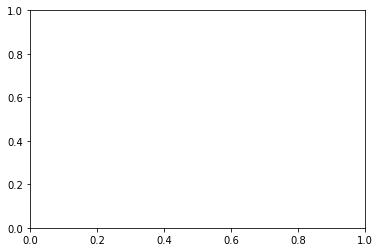

In [ ]:
plt.clf() #그래프 초기화하기
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'go', label='Training acc') #go : green dot
plt.plot(epochs, val_acc, 'g', label='Validation acc') #g : green line
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

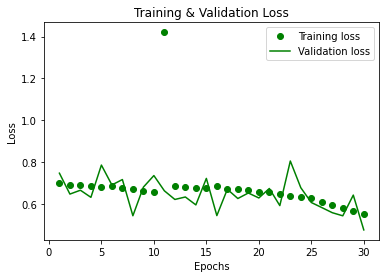

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'go', label='Training loss') #go : green dot
plt.plot(epochs, val_loss, 'g', label='Validation loss') #g : green line
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
test_dog_cat = np.concatenate((dog_data_test_adsize , cat_data_test_adsize) , axis = 0)
test_label = np.concatenate((cat_test , dog_test) , axis = 0)

In [ ]:
result = discriminator.evaluate(test_dog_cat[0:2000] , test_label)

63/63 [==============================] - 1s 13ms/step - loss: 0.8832 - acc: 0.0000e+00
